In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
import numpy as np
import plotly.express as px
import seaborn as sns
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
import warnings
from scipy import stats

### `WEB SCRAPING`

In [20]:
# Function to extract Product Title
def get_title(soup):

    try:
        # Outer Tag Object
        title = soup.find("span", attrs={"id":'productTitle'})
        
        # Inner NavigatableString Object
        title_value = title.text

        # Title as a string value
        title_string = title_value.strip()

    except AttributeError:
        title_string = ""

    return title_string

# Function to extract Product Price
def get_price(soup):

    try:
        price = soup.find("span", attrs={'class':'a-price-whole'}).text.strip()

    except AttributeError:
        price = ""

    return price

# Function to extract Product Rating
def get_rating(soup):

    try:
        rating = soup.find("i", attrs={'class':'a-icon a-icon-star a-star-4-5'}).string.strip()
    
    except AttributeError:
        try:
            rating = soup.find("span", attrs={'class':'a-icon-alt'}).string.strip()
        except:
            rating = ""

    return rating

# Function to extract Number of User Reviews
def get_review_count(soup):
    try:
        review_count = soup.find("span", attrs={'id':'acrCustomerReviewText'}).string.strip()

    except AttributeError:
        review_count = ""

    return review_count

# Function to extract Availability Status
def get_availability(soup):
    try:
        available = soup.find("div", attrs={'id':'availability'})
        available = available.find("span").string.strip()

    except AttributeError:
        available = "Not Available"

    return available

# Function to extract Brand
def get_brand(soup):
    try:
        brand = soup.find_all("span", attrs = {'class': 'a-size-base po-break-word'})[1].text
        
    except AttributeError:
        brand = ""

    return brand

# Function to extract Discount
def get_discount(soup):
    try:
        discount = soup.find("span" , attrs = {"class" :"a-size-large a-color-price savingPriceOverride aok-align-center reinventPriceSavingsPercentageMargin savingsPercentage"}).text
        
    except AttributeError:
        discount = ""

    return discount

# Function to extract Technology
def get_tech(soup):
    try:
        tech =  soup.find_all("span", attrs = {'class': 'a-size-base po-break-word'})[3].text
        
    except AttributeError:
        tech = ""

    return tech

# Function to extract Product Dimesions
def get_dim(soup):
    try:
        dim =  soup.find_all("span", attrs = {'class': 'a-size-base po-break-word'})[4].text
        
    except AttributeError:
        dim = ""

    return dim

# Function to extract Resolution
def get_res(soup):
    try:
        res =  soup.find_all("span", attrs = {'class': 'a-size-base po-break-word'})[5].text
        
    except AttributeError:
        res = ""

    return res


# Function to extract Refresh Rate
def get_refresh(soup):
    try:
        refresh =  soup.find_all("span", attrs = {'class': 'a-size-base po-break-word'})[6].text
        
    except AttributeError:
        refresh = ""

    return refresh


# Function to extract Screen Size
def get_size(soup):
    try:
        size =  soup.find("span", attrs = {'class': 'a-size-base po-break-word'}).text
        
    except AttributeError:
        size = ""

    return size

# Function to extract Ratings_no
def get_ratingsNo(soup):
    try:
        ratingsNo =  soup.find("span", attrs = {'class': 'a-size-base', 'id': 'acrCustomerReviewText'}).text
        
    except AttributeError:
        ratingsNo= ""

    return ratingsNo

# Function to extract Connectivity
def get_Connect(soup):
    try:
        Connect =  soup.find("tr", attrs = {'class': 'a-spacing-small po-connectivity_technology'}).text.strip()
        
    except AttributeError:
        Connect= ""

    return Connect


In [21]:
if __name__ == '__main__':
    
    # Headers for request
    HEADERS = ({'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36', 'Accept Language' : 'en-US,en:q=0.5'})
    
    # The webpage URL 
    url = "https://www.amazon.in/s?k=tv&crid=2AVBQD9DITO08&sprefix=tv%2Caps%2C500&ref=nb_sb_noss_1"
    
    # HTTP Request
    webpage = requests.get(url, headers = HEADERS)
    
    # SOUP object containing all data
    soup = BeautifulSoup(webpage.content,'html.parser')

    # Fetch links as list of tag objects
    links = soup.find_all("a", attrs = {'class': 'a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal'})
    
    # Store the links
    links_list = []
    
    # Loop for extracting links from Tag Objects
    for link in links:
        links_list.append(link.get('href'))
    d = {'title': [] , 'price' : [] , 'ratings': [] , 'reviews' : [] , 'availability': [] , 'brand' : [], 'discount' : [] ,  'tech' : [] ,  'dim' : [] ,  'res' : [] ,  'refresh' : [] ,  'size' : [] , 'ratingsNo' : [], 'Connect' : []}   
      
    # Loop for extracting product detils from each link
    for link in links_list:
        new_webpage = requests.get("https://www.amazon.in" + link , headers = HEADERS)
        new_soup = BeautifulSoup(new_webpage.content,"html.parser")
        
        # Function calls to display all necessary product information
        d['title'].append(get_title(new_soup))
        d['price'].append(get_price(new_soup))
        d['ratings'].append(get_rating(new_soup))
        d['availability'].append(get_availability(new_soup))    
        d['brand'].append(get_brand(new_soup))
        d['discount'].append(get_discount(new_soup))
        d['tech'].append(get_tech(new_soup))
        d['dim'].append(get_dim(new_soup))
        d['res'].append(get_res(new_soup))
        d['refresh'].append(get_refresh(new_soup))
        d['size'].append(get_size(new_soup))
        d['ratingsNo'].append(get_ratingsNo(new_soup))
        d['Connect'].append(get_Connect(new_soup))

In [22]:
amazon_df = pd.DataFrame.from_dict(d, orient='index')
amazon_df = amazon_df.transpose()
amazon_df['title'].replace('', np.nan, inplace=True)
amazon_df = amazon_df.dropna(subset=['title'])
amazon_df.to_csv("amazon_data.csv", header=True, index=False)

### Amazon Page 1

In [23]:
amazon_df.head()

,title,price,ratings,reviews,availability,brand,discount,tech,dim,res,refresh,size,ratingsNo,Connect
0,VU 139 cm (55 inches) The GloLED Series 4K Sma...,"37,999.",4.5 out of 5 stars,None,In stock,VU,-42%,LED,30.5D x 123W x 71.4H Centimeters,4K,60 Hz,55 Inches,"1,569 ratings",
1,TOSHIBA 126 cm (50 inches) C350LP Series 4K Ul...,"33,999.",4.5 out of 5 stars,None,In stock,TOSHIBA,-38%,LED,24.7D x 111.7W x 64.6H Centimeters,4K,60 Hz,50 Inches,"1,219 ratings","Connector Type Wi-Fi, USB, Ethernet, HDMI"
2,Redmi 80 cm (32 inches) HD Ready Smart LED Fir...,"13,999.",4.1 out of 5 stars,None,In stock,Redmi,-44%,LED,8.3D x 71.6W x 42.4H Centimeters,720p,60 Hz,32 Inches,161 ratings,"Connector Type Wi-Fi, USB, Ethernet, HDMI"
3,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,"11,999.",4.2 out of 5 stars,None,In stock,OnePlus,-40%,LED,6.5D x 42W x 71.3H Centimeters,8K,60 Hz,32 Inches,"37,682 ratings",
4,Samsung 80 cm (32 Inches) Wondertainment Serie...,"12,490.",4.4 stars,None,In stock,Samsung,-45%,LED,8.3D x 73.2W x 43.9H Centimeters,768p,60 Hz,32 Inches,"9,204 ratings","Connector Type Wi-Fi, USB, Ethernet, HDMI"


In [24]:
if __name__ == '__main__':
    
    # Headers for request
    HEADERS = ({'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36', 'Accept Language' : 'en-US,en:q=0.5'})
    
    # The webpage URL 
    url1 = "https://www.amazon.in/s?k=tv&page=2&crid=2AVBQD9DITO08&qid=1680235332&sprefix=tv%2Caps%2C500&ref=sr_pg_2"
    
    # HTTP Request
    webpage1 = requests.get(url1, headers = HEADERS)
    
    # SOUP object containing all data
    soup1 = BeautifulSoup(webpage1.content,'html.parser')

    # Fetch links as list of tag objects
    links1 = soup1.find_all("a", attrs = {'class': 'a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal'})
    
    # Store the links
    links_list1 = []
    
    # Loop for extracting links from Tag Objects
    for link1 in links1:
        links_list1.append(link1.get('href'))
    d1 = {'title': [] , 'price' : [] , 'ratings': [] , 'reviews' : [] , 'availability': [] , 'brand' : [], 'discount' : [] ,  'tech' : [] ,  'dim' : [] ,  'res' : [] ,  'refresh' : [] ,  'size' : [] , 'ratingsNo' : [], 'Connect' : []}   
      
    # Loop for extracting product detils from each link
    for link1 in links_list1:
        new_webpage1 = requests.get("https://www.amazon.in" + link1 , headers = HEADERS)
        new_soup1 = BeautifulSoup(new_webpage1.content,"html.parser")
        
        # Function calls to display all necessary product information
        d1['title'].append(get_title(new_soup1))
        d1['price'].append(get_price(new_soup1))
        d1['ratings'].append(get_rating(new_soup1))
        d1['availability'].append(get_availability(new_soup1))    
        d1['brand'].append(get_brand(new_soup1))
        d1['discount'].append(get_discount(new_soup1))
        d1['tech'].append(get_tech(new_soup1))
        d1['dim'].append(get_dim(new_soup1))
        d1['res'].append(get_res(new_soup1))
        d1['refresh'].append(get_refresh(new_soup1))
        d1['size'].append(get_size(new_soup1))
        d1['ratingsNo'].append(get_ratingsNo(new_soup1))
        d1['Connect'].append(get_Connect(new_soup1))

In [25]:
amazon_df1 = pd.DataFrame.from_dict(d1, orient='index')
amazon_df1 = amazon_df1.transpose()
amazon_df1['title'].replace('', np.nan, inplace=True)
amazon_df1 = amazon_df1.dropna(subset=['title'])
amazon_df1.to_csv("amazon_data1.csv", header=True, index=False)

### Amazon Page 2

In [26]:
amazon_df1.head()

,title,price,ratings,reviews,availability,brand,discount,tech,dim,res,refresh,size,ratingsNo,Connect
0,iFFALCON 80.04 cm (32 inches) Bezel-Less S Ser...,"12,999.",4.3 out of 5 stars,None,In stock,iFFALCON,-35%,8D x 71.5W x 46.8H Centimeters,768p,60 Hz,iFF32S53,32 Inches,219 ratings,
1,TCL 100 cm (40 inches) Full HD Certified Andro...,"16,990.",4.2 out of 5 stars,None,In stock,TCL,-59%,18.5D x 90.5W x 51.8H Centimeters,1080p,60 Hz,"Wi-Fi, USB, Ethernet, HDMI",40 Inches,"1,583 ratings","Connector Type Wi-Fi, USB, Ethernet, HDMI"
2,Acer 139 cm (55 inches) I Series 4K Ultra HD A...,"30,999.",4.4 out of 5 stars,None,In stock,Acer,-35%,LED,9.1D x 123.4W x 71.4H Centimeters,4K,60 Hz,55 Inches,"9,197 ratings",
3,OnePlus 126 cm (50 inches) Y Series 4K Ultra H...,"32,999.",4.2 out of 5 stars,None,In stock,OnePlus,-28%,LED,24.6D x 110W x 70.2H Centimeters,4K,60 Hz,50 Inches,"8,837 ratings",
4,Sony Bravia 108 cm (43 inches) 4K Ultra HD Sma...,"41,990.",4.7 out of 5 stars,None,In stock,Sony,-40%,LED,7.7D x 97.1W x 57.5H Centimeters,4K,60 Hz,43 Inches,"8,763 ratings",


In [27]:
if __name__ == '__main__':
    
    # Headers for request
    HEADERS = ({'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36', 'Accept Language' : 'en-US,en:q=0.5'})
    
    # The webpage URL 
    url2 = "https://www.amazon.in/s?k=tv&page=3&crid=2AVBQD9DITO08&qid=1680235337&sprefix=tv%2Caps%2C500&ref=sr_pg_3"
    
    # HTTP Request
    webpage2 = requests.get(url2, headers = HEADERS)
    
    # SOUP object containing all data
    soup2 = BeautifulSoup(webpage2.content,'html.parser')

    # Fetch links as list of tag objects
    links2 = soup2.find_all("a", attrs = {'class': 'a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal'})
    
    # Store the links
    links_list2 = []
    
    # Loop for extracting links from Tag Objects
    for link2 in links2:
        links_list2.append(link2.get('href'))
    d2 = {'title': [] , 'price' : [] , 'ratings': [] , 'reviews' : [] , 'availability': [] , 'brand' : [], 'discount' : [] ,  'tech' : [] ,  'dim' : [] ,  'res' : [] ,  'refresh' : [] ,  'size' : [] , 'ratingsNo' : [], 'Connect' : []}   
      
    # Loop for extracting product detils from each link
    for link2 in links_list2:
        new_webpage2 = requests.get("https://www.amazon.in" + link2 , headers = HEADERS)
        new_soup2 = BeautifulSoup(new_webpage2.content,"html.parser")
        
        # Function calls to display all necessary product information
        d2['title'].append(get_title(new_soup2))
        d2['price'].append(get_price(new_soup2))
        d2['ratings'].append(get_rating(new_soup2))
        d2['availability'].append(get_availability(new_soup2))    
        d2['brand'].append(get_brand(new_soup2))
        d2['discount'].append(get_discount(new_soup2))
        d2['tech'].append(get_tech(new_soup2))
        d2['dim'].append(get_dim(new_soup2))
        d2['res'].append(get_res(new_soup2))
        d2['refresh'].append(get_refresh(new_soup2))
        d2['size'].append(get_size(new_soup2))
        d2['ratingsNo'].append(get_ratingsNo(new_soup2))
        d2['Connect'].append(get_Connect(new_soup2))

In [28]:
amazon_df2 = pd.DataFrame.from_dict(d2, orient='index')
amazon_df2 = amazon_df2.transpose()
amazon_df2['title'].replace('', np.nan, inplace=True)
amazon_df2 = amazon_df2.dropna(subset=['title'])
amazon_df2.to_csv("amazon_data2.csv", header=True, index=False)

### Amazon Page 3

In [29]:
amazon_df2.head()

,title,price,ratings,reviews,availability,brand,discount,tech,dim,res,refresh,size,ratingsNo,Connect
0,iFFALCON 80.04 cm (32 inches) Bezel-Less S Ser...,"12,999.",4.3 out of 5 stars,None,In stock,iFFALCON,-35%,8D x 71.5W x 46.8H Centimeters,768p,60 Hz,iFF32S53,32 Inches,219 ratings,
1,Samsung 108 cm (43 inches) Crystal 4K Neo Seri...,"29,990.",4.3 out of 5 stars,None,In stock,Samsung,-37%,LED,7.8D x 96.3W x 56.2H Centimeters,4K,50 Hz,43 Inches,"8,239 ratings",
2,Samsung 108 cm (43 inches) Crystal 4K Series U...,"29,990.",4.3 out of 5 stars,None,In stock,Samsung,-43%,LED,19.3D x 123.1W x 62.7H Centimeters,4K,60 Hz,43 Inches,"8,239 ratings",
3,Kodak 80 cm (32 inches) HD Ready Certified And...,"9,499.",4.2 out of 5 stars,None,In stock,Kodak,-27%,LED,11D x 73.5W x 44H Centimeters,720p,60 Hz,32 Inches,"13,263 ratings",Connector Type Wi-Fi
4,Acer 109 cm (43 inches) I Series 4K Ultra HD A...,"22,999.",4.4 out of 5 stars,None,In stock,Acer,-34%,LED,8.9D x 96.6W x 56.6H Centimeters,4K,60 Hz,43 Inches,"9,197 ratings",


In [30]:
if __name__ == '__main__':
    
    # Headers for request
    HEADERS = ({'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36', 'Accept Language' : 'en-US,en:q=0.5'})
    
    # The webpage URL 
    url3 = "https://www.amazon.in/s?k=tv&page=4&crid=2AVBQD9DITO08&qid=1680237143&sprefix=tv%2Caps%2C500&ref=sr_pg_4"
    
    # HTTP Request
    webpage3 = requests.get(url3, headers = HEADERS)
    
    # SOUP object containing all data
    soup3 = BeautifulSoup(webpage3.content,'html.parser')

    # Fetch links as list of tag objects
    links3 = soup3.find_all("a", attrs = {'class': 'a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal'})
    
    # Store the links
    links_list3 = []
    
    # Loop for extracting links from Tag Objects
    for link3 in links3:
        links_list3.append(link3.get('href'))
    d3 = {'title': [] , 'price' : [] , 'ratings': [] , 'reviews' : [] , 'availability': [] , 'brand' : [], 'discount' : [] ,  'tech' : [] ,  'dim' : [] ,  'res' : [] ,  'refresh' : [] ,  'size' : [] , 'ratingsNo' : [], 'Connect' : []}   
      
    # Loop for extracting product detils from each link
    for link3 in links_list3:
        new_webpage3 = requests.get("https://www.amazon.in" + link3 , headers = HEADERS)
        new_soup3 = BeautifulSoup(new_webpage3.content,"html.parser")
        
        # Function calls to display all necessary product information
        d3['title'].append(get_title(new_soup3))
        d3['price'].append(get_price(new_soup3))
        d3['ratings'].append(get_rating(new_soup3))
        d3['availability'].append(get_availability(new_soup3))    
        d3['brand'].append(get_brand(new_soup3))
        d3['discount'].append(get_discount(new_soup3))
        d3['tech'].append(get_tech(new_soup3))
        d3['dim'].append(get_dim(new_soup3))
        d3['res'].append(get_res(new_soup3))
        d3['refresh'].append(get_refresh(new_soup3))
        d3['size'].append(get_size(new_soup3))
        d3['ratingsNo'].append(get_ratingsNo(new_soup3))
        d3['Connect'].append(get_Connect(new_soup3))

In [31]:
amazon_df3 = pd.DataFrame.from_dict(d3, orient='index')
amazon_df3 = amazon_df3.transpose()
amazon_df3['title'].replace('', np.nan, inplace=True)
amazon_df3 = amazon_df3.dropna(subset=['title'])
amazon_df3.to_csv("amazon_data3.csv", header=True, index=False)

### Amazon Page 4

In [32]:
amazon_df3.head()

,title,price,ratings,reviews,availability,brand,discount,tech,dim,res,refresh,size,ratingsNo,Connect
0,iFFALCON 80.04 cm (32 inches) Bezel-Less S Ser...,"12,999.",4.3 out of 5 stars,None,In stock,iFFALCON,-35%,8D x 71.5W x 46.8H Centimeters,768p,60 Hz,iFF32S53,32 Inches,219 ratings,
1,TCL 100 cm (40 inches) Full HD Certified Andro...,"16,990.",4.2 out of 5 stars,None,In stock,TCL,-59%,18.5D x 90.5W x 51.8H Centimeters,1080p,60 Hz,"Wi-Fi, USB, Ethernet, HDMI",40 Inches,"1,583 ratings","Connector Type Wi-Fi, USB, Ethernet, HDMI"
2,Onida 80 cm (32 inches) HD Ready Smart LED Fir...,"12,990.",4.3 out of 5 stars,None,In stock,Onida,-48%,LED,8.2D x 72.6W x 42.7H Centimeters,720p,60 Hz,32 Inches,"4,648 ratings",
3,LG 164 cm (65 Inches) 4K Ultra HD Smart NanoCe...,"1,99,999.",4.5 stars,None,Only 1 left in stock,LG,-27%,NanoCell,4K,50 Hz,Smart TV ThinQ AI | Mobile connection overlay ...,65 Inches,1 rating,"Connector Type Wi-Fi, USB, HDMI"
4,MI 100 cm (40 inches) 5A Series Full HD Smart ...,"20,999.",4.5 out of 5 stars,None,In stock,MI,-30%,LED,21D x 9.2W x 55.9H Centimeters,1080p,60 Hz,40 Inches,"34,970 ratings",


In [33]:
if __name__ == '__main__':
    
    # Headers for request
    HEADERS = ({'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36', 'Accept Language' : 'en-US,en:q=0.5'})
    
    # The webpage URL 
    url4 = "https://www.amazon.in/s?k=tv&page=4&crid=2AVBQD9DITO08&qid=1680237143&sprefix=tv%2Caps%2C500&ref=sr_pg_5"
    
    # HTTP Request
    webpage4 = requests.get(url4, headers = HEADERS)
    
    # SOUP object containing all data
    soup4 = BeautifulSoup(webpage4.content,'html.parser')

    # Fetch links as list of tag objects
    links4 = soup4.find_all("a", attrs = {'class': 'a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal'})
    
    # Store the links
    links_list4 = []
    
    # Loop for extracting links from Tag Objects
    for link4 in links4:
        links_list4.append(link4.get('href'))
    d4 = {'title': [] , 'price' : [] , 'ratings': [] , 'reviews' : [] , 'availability': [] , 'brand' : [], 'discount' : [] ,  'tech' : [] ,  'dim' : [] ,  'res' : [] ,  'refresh' : [] ,  'size' : [] , 'ratingsNo' : [], 'Connect' : []}   
      
    # Loop for extracting product detils from each link
    for link4 in links_list4:
        new_webpage4 = requests.get("https://www.amazon.in" + link4 , headers = HEADERS)
        new_soup4 = BeautifulSoup(new_webpage4.content,"html.parser")
        
        # Function calls to display all necessary product information
        d4['title'].append(get_title(new_soup4))
        d4['price'].append(get_price(new_soup4))
        d4['ratings'].append(get_rating(new_soup4))
        d4['availability'].append(get_availability(new_soup4))    
        d4['brand'].append(get_brand(new_soup4))
        d4['discount'].append(get_discount(new_soup4))
        d4['tech'].append(get_tech(new_soup4))
        d4['dim'].append(get_dim(new_soup4))
        d4['res'].append(get_res(new_soup4))
        d4['refresh'].append(get_refresh(new_soup4))
        d4['size'].append(get_size(new_soup4))
        d4['ratingsNo'].append(get_ratingsNo(new_soup4))
        d4['Connect'].append(get_Connect(new_soup4))

In [34]:
amazon_df4 = pd.DataFrame.from_dict(d4, orient='index')
amazon_df4 = amazon_df4.transpose()
amazon_df4['title'].replace('', np.nan, inplace=True)
amazon_df4 = amazon_df4.dropna(subset=['title'])
amazon_df4.to_csv("amazon_data4.csv", header=True, index=False)

### Amazon Page 5

In [35]:
amazon_df4.head()

,title,price,ratings,reviews,availability,brand,discount,tech,dim,res,refresh,size,ratingsNo,Connect
0,iFFALCON 80.04 cm (32 inches) Bezel-Less S Ser...,"12,999.",4.3 out of 5 stars,None,In stock,iFFALCON,-35%,8D x 71.5W x 46.8H Centimeters,768p,60 Hz,iFF32S53,32 Inches,219 ratings,
1,TCL 100 cm (40 inches) Full HD Certified Andro...,"16,990.",4.2 out of 5 stars,None,In stock,TCL,-59%,18.5D x 90.5W x 51.8H Centimeters,1080p,60 Hz,"Wi-Fi, USB, Ethernet, HDMI",40 Inches,"1,583 ratings","Connector Type Wi-Fi, USB, Ethernet, HDMI"
2,Onida 80 cm (32 inches) HD Ready Smart LED Fir...,"12,990.",4.3 out of 5 stars,None,In stock,Onida,-48%,LED,8.2D x 72.6W x 42.7H Centimeters,720p,60 Hz,32 Inches,"4,648 ratings",
3,LG 164 cm (65 Inches) 4K Ultra HD Smart NanoCe...,"1,99,999.",4.5 stars,None,Only 1 left in stock,LG,-27%,NanoCell,4K,50 Hz,Smart TV ThinQ AI | Mobile connection overlay ...,65 Inches,1 rating,"Connector Type Wi-Fi, USB, HDMI"
4,MI 100 cm (40 inches) 5A Series Full HD Smart ...,"20,999.",4.2 out of 5 stars,None,In stock,MI,-30%,LED,21D x 9.2W x 55.9H Centimeters,1080p,60 Hz,40 Inches,"34,970 ratings",


### Merging 5 pages together

In [36]:
final_df = pd.concat([amazon_df,amazon_df1,amazon_df2,amazon_df3,amazon_df4])
final_df

,title,price,ratings,reviews,availability,brand,discount,tech,dim,res,refresh,size,ratingsNo,Connect
0,VU 139 cm (55 inches) The GloLED Series 4K Sma...,"37,999.",4.5 out of 5 stars,None,In stock,VU,-42%,LED,30.5D x 123W x 71.4H Centimeters,4K,60 Hz,55 Inches,"1,569 ratings",
1,TOSHIBA 126 cm (50 inches) C350LP Series 4K Ul...,"33,999.",4.5 out of 5 stars,None,In stock,TOSHIBA,-38%,LED,24.7D x 111.7W x 64.6H Centimeters,4K,60 Hz,50 Inches,"1,219 ratings","Connector Type Wi-Fi, USB, Ethernet, HDMI"
2,Redmi 80 cm (32 inches) HD Ready Smart LED Fir...,"13,999.",4.1 out of 5 stars,None,In stock,Redmi,-44%,LED,8.3D x 71.6W x 42.4H Centimeters,720p,60 Hz,32 Inches,161 ratings,"Connector Type Wi-Fi, USB, Ethernet, HDMI"
3,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,"11,999.",4.2 out of 5 stars,None,In stock,OnePlus,-40%,LED,6.5D x 42W x 71.3H Centimeters,8K,60 Hz,32 Inches,"37,682 ratings",
4,Samsung 80 cm (32 Inches) Wondertainment Serie...,"12,490.",4.4 stars,None,In stock,Samsung,-45%,LED,8.3D x 73.2W x 43.9H Centimeters,768p,60 Hz,32 Inches,"9,204 ratings","Connector Type Wi-Fi, USB, Ethernet, HDMI"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,Hisense 126 cm (50 inches) Tornado 2.0 Series ...,"34,999.",4.4 out of 5 stars,None,In stock,Hisense,-36%,LED,7.8D x 111.8W x 67.6H Centimeters,4K,60 Hz,50 Inches,539 ratings,
18,Kodak 80 cm (32 inches) HD Ready Certified And...,"9,499.",4.1 out of 5 stars,None,In stock,Kodak,-51%,LED,44D x 73.5W x 9H Centimeters,720p,60 Hz,32 Inches,"2,765 ratings","Connector Type Wi-Fi, USB, Ethernet, HDMI"
19,VU 108 cm (43 inches) The GloLED 84 Watt DJ So...,"31,490.",4.5 out of 5 stars,None,In stock,VU,-21%,LED,8.6D x 96.2W x 56H Centimeters,4K,60 Hz,43 Inches,"1,569 ratings",
20,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,"12,999.",4.2 out of 5 stars,None,In stock,MI,-48%,LED,19D x 71.5W x 47H Centimeters,720p,60 Hz,32 Inches,"34,970 ratings",


In [37]:
final_df['title'].replace('', np.nan, inplace=True)
final_df = final_df.dropna(subset=['title'])
final_df.to_csv("final_df.csv", header=True, index=False)

### `Using Excel to remove duplicate entries` 
**To remove duplicate entries of products of TV  in excel:** <br>
 Data -> Data Tools -> Remove Duplicates -> Title -> OK <br>
Result : 35 duplicates found and removed, 75 remained

### `FINAL DF`

In [108]:
df = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\final_df.csv",index_col=False)

In [109]:
df.head()

,title,price,ratings,reviews,availability,brand,discount,tech,dim,res,refresh,size,ratingsNo,Connect
0,Kodak 139 cm (55 inches) 4K Ultra HD Smart Cer...,29999.0,4.4 out of 5 stars,NaN,In stock,Kodak,-45%,LED,29D x 124W x 78H Centimeters,4000.0,60 Hz,55 Inches,597 ratings,NaN
1,OnePlus 138 cm (55 inches) Y Series 4K Ultra H...,39999.0,4.2 out of 5 stars,NaN,In stock,OnePlus,-20%,LED,24.6D x 135W x 77.1H Centimeters,4000.0,60 Hz,55 Inches,8532 ratings,NaN
2,Redmi 80 cm (32 inches) HD Ready Smart LED Fir...,13999.0,4.0 out of 5 stars,NaN,In stock,Redmi,-44%,LED,8.3D x 71.6W x 42.4H Centimeters,7500.0,60 Hz,32 Inches,69 ratings,"Connector Type Wi-Fi, USB, Ethernet, HDMI"
3,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,14999.0,4.5 out of 5 stars,NaN,In stock,OnePlus,-25%,LED,6.5D x 42W x 71.3H Centimeters,8000.0,60 Hz,32 Inches,37174 ratings,NaN
4,Acer 100 cm (40 inches) P Series Full HD Andro...,16999.0,4.4 out of 5 stars,NaN,In stock,Acer,-32%,LED,8.5D x 90.4W x 51.6H Centimeters,11225.0,60 Hz,40 Inches,8521 ratings,NaN


### `DATA PRE PROCESSING`

In [110]:
#Checking for null values

df.isnull().sum()

title            0
price            6
ratings          2
reviews         75
availability     0
brand            0
discount        10
tech             0
dim              2
res              1
refresh          0
size             0
ratingsNo        3
Connect         51
dtype: int64

### 1) Extracting numerical values from columns

##### BEFORE

In [111]:
df.head()

,title,price,ratings,reviews,availability,brand,discount,tech,dim,res,refresh,size,ratingsNo,Connect
0,Kodak 139 cm (55 inches) 4K Ultra HD Smart Cer...,29999.0,4.4 out of 5 stars,NaN,In stock,Kodak,-45%,LED,29D x 124W x 78H Centimeters,4000.0,60 Hz,55 Inches,597 ratings,NaN
1,OnePlus 138 cm (55 inches) Y Series 4K Ultra H...,39999.0,4.2 out of 5 stars,NaN,In stock,OnePlus,-20%,LED,24.6D x 135W x 77.1H Centimeters,4000.0,60 Hz,55 Inches,8532 ratings,NaN
2,Redmi 80 cm (32 inches) HD Ready Smart LED Fir...,13999.0,4.0 out of 5 stars,NaN,In stock,Redmi,-44%,LED,8.3D x 71.6W x 42.4H Centimeters,7500.0,60 Hz,32 Inches,69 ratings,"Connector Type Wi-Fi, USB, Ethernet, HDMI"
3,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,14999.0,4.5 out of 5 stars,NaN,In stock,OnePlus,-25%,LED,6.5D x 42W x 71.3H Centimeters,8000.0,60 Hz,32 Inches,37174 ratings,NaN
4,Acer 100 cm (40 inches) P Series Full HD Andro...,16999.0,4.4 out of 5 stars,NaN,In stock,Acer,-32%,LED,8.5D x 90.4W x 51.6H Centimeters,11225.0,60 Hz,40 Inches,8521 ratings,NaN


In [112]:
# Dropping reviews column as it is empty

df = df.drop(df.columns[3], axis=1)

In [113]:
# Dropping connect column as 51 are empty

df = df.drop(df.columns[12], axis=1)

#### Using Regex to extract numerical values from columns with categorical and numerical values together. 

In [114]:
# extracting ratings from string

df['ratingsNo'] = df.ratingsNo.str.extract('(\d+\d*)')

In [115]:
# extracting discount from string

df['refresh'] = df.refresh.str.extract('(\d+)')

In [116]:
# extracting discount from string

df['discount'] = df.discount.str.extract('(\d+)')

In [117]:
# extracting discount from string

df['ratings'] = df.ratings.str.extract('(\d+\.?\d*)')

##### AFTER

In [118]:
df.head()

,title,price,ratings,availability,brand,discount,tech,dim,res,refresh,size,ratingsNo
0,Kodak 139 cm (55 inches) 4K Ultra HD Smart Cer...,29999.0,4.4,In stock,Kodak,45,LED,29D x 124W x 78H Centimeters,4000.0,60,55 Inches,597
1,OnePlus 138 cm (55 inches) Y Series 4K Ultra H...,39999.0,4.2,In stock,OnePlus,20,LED,24.6D x 135W x 77.1H Centimeters,4000.0,60,55 Inches,8532
2,Redmi 80 cm (32 inches) HD Ready Smart LED Fir...,13999.0,4.0,In stock,Redmi,44,LED,8.3D x 71.6W x 42.4H Centimeters,7500.0,60,32 Inches,69
3,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,14999.0,4.5,In stock,OnePlus,25,LED,6.5D x 42W x 71.3H Centimeters,8000.0,60,32 Inches,37174
4,Acer 100 cm (40 inches) P Series Full HD Andro...,16999.0,4.4,In stock,Acer,32,LED,8.5D x 90.4W x 51.6H Centimeters,11225.0,60,40 Inches,8521


In [119]:
## Used on features : ratingsNo, refresh, discount, ratings
## Result: Able to extract numerical values

### 2) ONE HOT ENCODING

#### Used to give labels and get the value assigned to each label.

In [120]:
df['tech'].value_counts()

LED     70
QLED     4
OLED     1
Name: tech, dtype: int64

In [121]:
df['availability'].value_counts()

In stock                  72
Currently unavailable.     2
Only 2 left in stock       1
Name: availability, dtype: int64

In [122]:
df['tech'] = pd.get_dummies(df['tech'] )

In [123]:
df['availability'] = pd.get_dummies(df['availability'] )

##### AFTER

In [124]:
df.head()

,title,price,ratings,availability,brand,discount,tech,dim,res,refresh,size,ratingsNo
0,Kodak 139 cm (55 inches) 4K Ultra HD Smart Cer...,29999.0,4.4,0,Kodak,45,1,29D x 124W x 78H Centimeters,4000.0,60,55 Inches,597
1,OnePlus 138 cm (55 inches) Y Series 4K Ultra H...,39999.0,4.2,0,OnePlus,20,1,24.6D x 135W x 77.1H Centimeters,4000.0,60,55 Inches,8532
2,Redmi 80 cm (32 inches) HD Ready Smart LED Fir...,13999.0,4.0,0,Redmi,44,1,8.3D x 71.6W x 42.4H Centimeters,7500.0,60,32 Inches,69
3,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,14999.0,4.5,0,OnePlus,25,1,6.5D x 42W x 71.3H Centimeters,8000.0,60,32 Inches,37174
4,Acer 100 cm (40 inches) P Series Full HD Andro...,16999.0,4.4,0,Acer,32,1,8.5D x 90.4W x 51.6H Centimeters,11225.0,60,40 Inches,8521


In [125]:
## Used on features : tech, availability
## Assigned labels to tech and availability

### 3) IMPUTATION

#### Used mean imputation to replace nan values.

##### BEFORE

In [126]:
#Checking for null values

df.isnull().sum()

title            0
price            6
ratings          2
availability     0
brand            0
discount        10
tech             0
dim              2
res              1
refresh          0
size             0
ratingsNo        3
dtype: int64

In [127]:
# Mean Imputation
mean_imputer = SimpleImputer(strategy='mean')
df['discount'] = mean_imputer.fit_transform(df['discount'].values.reshape(-1,1))

In [128]:
# Mean Imputation
mean_imputer = SimpleImputer(strategy='mean')
df['res'] = mean_imputer.fit_transform(df['res'].values.reshape(-1,1))

In [129]:
# Mean Imputation

mean_imputer = SimpleImputer(strategy='mean')
df['price'] = mean_imputer.fit_transform(df['price'].values.reshape(-1,1))

In [130]:
# Mean Imputation

mean_imputer = SimpleImputer(strategy='mean')
df['ratings'] = mean_imputer.fit_transform(df['ratings'].values.reshape(-1,1))

In [131]:
# Mean Imputation

mean_imputer = SimpleImputer(strategy='mean')
df['ratingsNo'] = mean_imputer.fit_transform(df['ratingsNo'].values.reshape(-1,1))

##### AFTER

In [132]:
#Checking for null values

df.isnull().sum()

title           0
price           0
ratings         0
availability    0
brand           0
discount        0
tech            0
dim             2
res             0
refresh         0
size            0
ratingsNo       0
dtype: int64

In [133]:
## Used on features : discount, res, price, ratings, ratingsNo
## Result : Removed null values

### 4) OUTLIERS DETECTION

#### Used box plot to detect outliers

##### BEFORE

In [134]:
plot = px.box(df['discount'])
plot.show()

**Observation** : 4 outliers present

In [135]:
plot = px.box(df['price'])
plot.show()

**Observation** : 2 outliers present

In [136]:
plot = px.box(df['ratingsNo'])
plot.show()

**Observation** : 4 outliers present

In [137]:
plot = px.box(df['ratings'])
plot.show()

**Observation** : 2 outliers present

### REMOVING OUTLIERS

#### Removed outliers by using percentile and interquartile range in a user defined function.

In [138]:
for x in ['discount']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [139]:
for x in ['price']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [140]:
for x in ['ratings']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [141]:
for x in ['ratingsNo']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [142]:
# Assigned nan values to outliers

df.isnull().sum()

title           0
price           3
ratings         2
availability    0
brand           0
discount        4
tech            0
dim             2
res             0
refresh         0
size            0
ratingsNo       9
dtype: int64

In [143]:
# Removng outliers

df = df[df['price'].notna()]
df = df[df['ratings'].notna()]
df = df[df['ratings'].notna()]
df = df[df['discount'].notna()]
df = df[df['ratingsNo'].notna()]

##### AFTER

In [144]:
plot = px.box(df['discount'])
plot.show()

In [145]:
plot = px.box(df['price'])
plot.show()

In [146]:
plot = px.box(df['ratingsNo'])
plot.show()

In [147]:
plot = px.box(df['ratings'])
plot.show()

In [148]:
## Used on features : discount, price, ratings, ratingsNo
## Result : Outliers removed

### 5) BINNING

##### BEFORE

In [149]:
df.head()

,title,price,ratings,availability,brand,discount,tech,dim,res,refresh,size,ratingsNo
0,Kodak 139 cm (55 inches) 4K Ultra HD Smart Cer...,29999.0,4.4,0,Kodak,45.0,1,29D x 124W x 78H Centimeters,4000.0,60,55 Inches,597.0
1,OnePlus 138 cm (55 inches) Y Series 4K Ultra H...,39999.0,4.2,0,OnePlus,20.0,1,24.6D x 135W x 77.1H Centimeters,4000.0,60,55 Inches,8532.0
2,Redmi 80 cm (32 inches) HD Ready Smart LED Fir...,13999.0,4.0,0,Redmi,44.0,1,8.3D x 71.6W x 42.4H Centimeters,7500.0,60,32 Inches,69.0
4,Acer 100 cm (40 inches) P Series Full HD Andro...,16999.0,4.4,0,Acer,32.0,1,8.5D x 90.4W x 51.6H Centimeters,11225.0,60,40 Inches,8521.0
5,Sony Bravia 126 cm (50 inches) 4K Ultra HD Sma...,51999.0,4.7,0,Sony,39.0,1,7.7D x 112.7W x 66.2H Centimeters,4000.0,60,50 Inches,8364.0


#### Created bins to form classes

In [150]:
bins = [3500, 13500, 23500, 33500, 43500, 53500, 63500, 73500, 83500, 93500]
df['price'] = pd.cut(df['price'],bins)

In [151]:
bins = [19,40,60,80]
df['discount'] = pd.cut(df['discount'],bins)

In [152]:
bins = [0,2000,4000,6000,8000,10000,12000,14000]
df['ratingsNo'] = pd.cut(df['ratingsNo'],bins)

##### AFTER

In [153]:
df.head()

,title,price,ratings,availability,brand,discount,tech,dim,res,refresh,size,ratingsNo,price_bins,discount_bins,ratingsNo_bins
0,Kodak 139 cm (55 inches) 4K Ultra HD Smart Cer...,29999.0,4.4,0,Kodak,45.0,1,29D x 124W x 78H Centimeters,4000.0,60,55 Inches,597.0,"(23500, 33500]","(40, 60]","(0, 2000]"
1,OnePlus 138 cm (55 inches) Y Series 4K Ultra H...,39999.0,4.2,0,OnePlus,20.0,1,24.6D x 135W x 77.1H Centimeters,4000.0,60,55 Inches,8532.0,"(33500, 43500]","(19, 40]","(8000, 10000]"
2,Redmi 80 cm (32 inches) HD Ready Smart LED Fir...,13999.0,4.0,0,Redmi,44.0,1,8.3D x 71.6W x 42.4H Centimeters,7500.0,60,32 Inches,69.0,"(13500, 23500]","(40, 60]","(0, 2000]"
4,Acer 100 cm (40 inches) P Series Full HD Andro...,16999.0,4.4,0,Acer,32.0,1,8.5D x 90.4W x 51.6H Centimeters,11225.0,60,40 Inches,8521.0,"(13500, 23500]","(19, 40]","(8000, 10000]"
5,Sony Bravia 126 cm (50 inches) 4K Ultra HD Sma...,51999.0,4.7,0,Sony,39.0,1,7.7D x 112.7W x 66.2H Centimeters,4000.0,60,50 Inches,8364.0,"(43500, 53500]","(19, 40]","(8000, 10000]"


In [154]:
## Used on features : discount, price, ratingsNo
## Result : Created bins to form classes

### 6) FEATURE SPLIT

##### BEFORE

In [155]:
df['dim'].head()

0         29D x 124W x 78H Centimeters
1     24.6D x 135W x 77.1H Centimeters
2     8.3D x 71.6W x 42.4H Centimeters
4     8.5D x 90.4W x 51.6H Centimeters
5    7.7D x 112.7W x 66.2H Centimeters
Name: dim, dtype: object

#### Used str.split to split features stored in one cell into different features.

In [156]:
dim = df.dim.str.split(expand=True)
dim.head()

,0,1,2,3,4,5
0,29D,x,124W,x,78H,Centimeters
1,24.6D,x,135W,x,77.1H,Centimeters
2,8.3D,x,71.6W,x,42.4H,Centimeters
4,8.5D,x,90.4W,x,51.6H,Centimeters
5,7.7D,x,112.7W,x,66.2H,Centimeters


In [157]:
dim = dim.drop(dim.columns[1], axis=1)
dim = dim.drop(dim.columns[4], axis=1)
dim = dim.drop(dim.columns[2], axis=1)

In [158]:
dim.head()

,0,2,4
0,29D,124W,78H
1,24.6D,135W,77.1H
2,8.3D,71.6W,42.4H
4,8.5D,90.4W,51.6H
5,7.7D,112.7W,66.2H


In [159]:
df = pd.concat([df,dim], axis=1)
df.head()

,title,price,ratings,availability,brand,discount,tech,dim,res,refresh,size,ratingsNo,price_bins,discount_bins,ratingsNo_bins,0,2,4
0,Kodak 139 cm (55 inches) 4K Ultra HD Smart Cer...,29999.0,4.4,0,Kodak,45.0,1,29D x 124W x 78H Centimeters,4000.0,60,55 Inches,597.0,"(23500, 33500]","(40, 60]","(0, 2000]",29D,124W,78H
1,OnePlus 138 cm (55 inches) Y Series 4K Ultra H...,39999.0,4.2,0,OnePlus,20.0,1,24.6D x 135W x 77.1H Centimeters,4000.0,60,55 Inches,8532.0,"(33500, 43500]","(19, 40]","(8000, 10000]",24.6D,135W,77.1H
2,Redmi 80 cm (32 inches) HD Ready Smart LED Fir...,13999.0,4.0,0,Redmi,44.0,1,8.3D x 71.6W x 42.4H Centimeters,7500.0,60,32 Inches,69.0,"(13500, 23500]","(40, 60]","(0, 2000]",8.3D,71.6W,42.4H
4,Acer 100 cm (40 inches) P Series Full HD Andro...,16999.0,4.4,0,Acer,32.0,1,8.5D x 90.4W x 51.6H Centimeters,11225.0,60,40 Inches,8521.0,"(13500, 23500]","(19, 40]","(8000, 10000]",8.5D,90.4W,51.6H
5,Sony Bravia 126 cm (50 inches) 4K Ultra HD Sma...,51999.0,4.7,0,Sony,39.0,1,7.7D x 112.7W x 66.2H Centimeters,4000.0,60,50 Inches,8364.0,"(43500, 53500]","(19, 40]","(8000, 10000]",7.7D,112.7W,66.2H


In [160]:
df.rename(columns = {0:'Depth'}, inplace = True)
df.rename(columns = {2: 'Width'}, inplace = True)
df.rename(columns = {4: 'Height'}, inplace = True)

In [161]:
# dropping origonal dimensions column

df = df.drop(df.columns[7], axis=1)

In [162]:
# extracting numerical value from depth

df['Depth'] = [(str(i).replace("D", "")) for i in df["Depth"]]

In [163]:
# extracting numerical value from width

df['Width'] = [(str(i).replace("W", "")) for i in df["Width"]]

In [164]:
# extracting numerical value from height

df['Height'] = [(str(i).replace("H", "")) for i in df["Height"]]

In [165]:
# extracting numerical value from size

df['size'] = [(str(i).replace("Inches", "")) for i in df["size"]]

##### AFTER

In [166]:
df.head()

,title,price,ratings,availability,brand,discount,tech,res,refresh,size,ratingsNo,price_bins,discount_bins,ratingsNo_bins,Depth,Width,Height
0,Kodak 139 cm (55 inches) 4K Ultra HD Smart Cer...,29999.0,4.4,0,Kodak,45.0,1,4000.0,60,55,597.0,"(23500, 33500]","(40, 60]","(0, 2000]",29,124,78
1,OnePlus 138 cm (55 inches) Y Series 4K Ultra H...,39999.0,4.2,0,OnePlus,20.0,1,4000.0,60,55,8532.0,"(33500, 43500]","(19, 40]","(8000, 10000]",24.6,135,77.1
2,Redmi 80 cm (32 inches) HD Ready Smart LED Fir...,13999.0,4.0,0,Redmi,44.0,1,7500.0,60,32,69.0,"(13500, 23500]","(40, 60]","(0, 2000]",8.3,71.6,42.4
4,Acer 100 cm (40 inches) P Series Full HD Andro...,16999.0,4.4,0,Acer,32.0,1,11225.0,60,40,8521.0,"(13500, 23500]","(19, 40]","(8000, 10000]",8.5,90.4,51.6
5,Sony Bravia 126 cm (50 inches) 4K Ultra HD Sma...,51999.0,4.7,0,Sony,39.0,1,4000.0,60,50,8364.0,"(43500, 53500]","(19, 40]","(8000, 10000]",7.7,112.7,66.2


In [167]:
## Splitted dim into 3 different features named depth, width and height.
## Used on features : dim

### 7) SCALING

#### Checked skewness through normal distribution plot and using .skew

##### BEFORE

In [168]:
print(df.skew())

price           0.654896
ratings         0.012278
availability    5.286587
discount        0.379598
tech           -5.286587
res             1.146210
refresh         4.953496
size            0.336603
ratingsNo       0.528544
dtype: float64


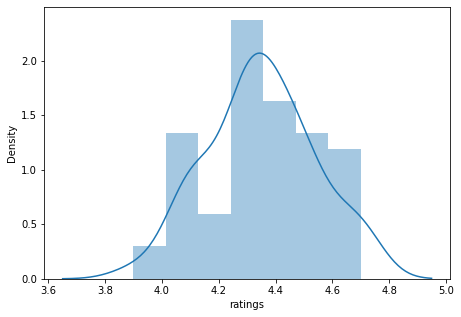

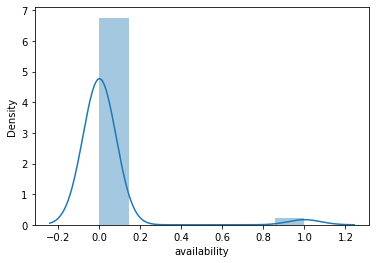

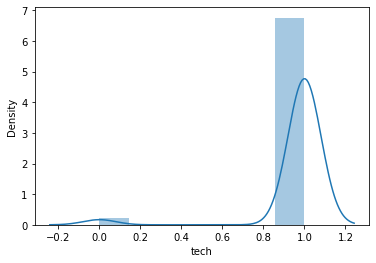

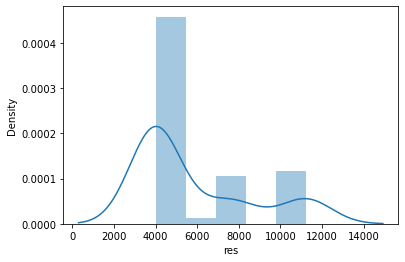

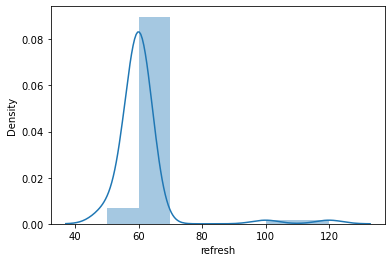

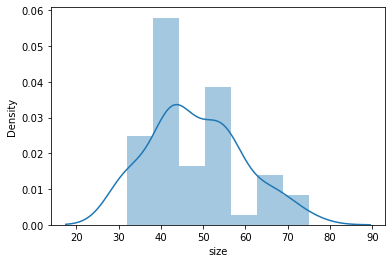

In [169]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['ratings'])
plt.show()
sns.distplot(df['availability'])
plt.show()
sns.distplot(df['tech'])
plt.show()
sns.distplot(df['res'])
plt.show()
sns.distplot(df['refresh'])
plt.show()
sns.distplot(df['size'])
plt.show()

In [170]:
df['tech'] = df['tech'].astype(float)

In [171]:
df['refresh'] = df['refresh'].astype(float)

In [172]:
df['availability'] = df['availability'].astype(float)

In [173]:
df['res'] = df['res'].astype(float)

#### Using z score to solve the problem of skewness

In [174]:
z = np.abs(stats.zscore(df['availability']))
df['availability'] = df['availability'][(z < 3)]

In [175]:
z = np.abs(stats.zscore(df['tech']))
df['tech'] = df['tech'][(z < 3)]

#### Using boxcox to solve the problem of skewness

In [176]:
from scipy.stats import boxcox
df['res_boxcox'],lambda_boxcox = boxcox(df['res'])
print(df[['res','res_boxcox']])
print("Lambda value:",lambda_boxcox)

             res  res_boxcox
0    4000.000000    0.393851
1    4000.000000    0.393851
2    7500.000000    0.393851
4   11225.000000    0.393851
5    4000.000000    0.393851
6    8000.000000    0.393851
7    8000.000000    0.393851
9    4000.000000    0.393851
10   4000.000000    0.393851
12   4000.000000    0.393851
13   4000.000000    0.393851
14   4000.000000    0.393851
15   4000.000000    0.393851
16   4000.000000    0.393851
17   4000.000000    0.393851
18  11225.000000    0.393851
19   4000.000000    0.393851
20   4000.000000    0.393851
22   4000.000000    0.393851
23   4000.000000    0.393851
25   7500.000000    0.393851
26   4000.000000    0.393851
27   4000.000000    0.393851
28   4000.000000    0.393851
30  11225.000000    0.393851
31   4000.000000    0.393851
32   4000.000000    0.393851
33  11225.000000    0.393851
34   4000.000000    0.393851
35   4000.000000    0.393851
36  11225.000000    0.393851
38   4000.000000    0.393851
40   4000.000000    0.393851
41   7500.0000

In [177]:
from scipy.stats import boxcox
df['refresh_boxcox'],lambda_boxcox = boxcox(df['refresh'])
print(df[['refresh','refresh_boxcox']])
print("Lambda value:",lambda_boxcox)

    refresh  refresh_boxcox
0      60.0        0.295867
1      60.0        0.295867
2      60.0        0.295867
4      60.0        0.295867
5      60.0        0.295867
6      60.0        0.295867
7      60.0        0.295867
9      60.0        0.295867
10     50.0        0.295867
12     60.0        0.295867
13     60.0        0.295867
14     50.0        0.295867
15     60.0        0.295867
16     60.0        0.295867
17     60.0        0.295867
18     60.0        0.295867
19     60.0        0.295867
20     60.0        0.295867
22     60.0        0.295867
23     60.0        0.295867
25     60.0        0.295867
26     60.0        0.295867
27     60.0        0.295867
28     60.0        0.295867
30     60.0        0.295867
31     60.0        0.295867
32     60.0        0.295867
33     60.0        0.295867
34     60.0        0.295867
35     60.0        0.295867
36     60.0        0.295867
38     60.0        0.295867
40     60.0        0.295867
41     60.0        0.295867
43     60.0        0

In [178]:
df['res_boxcox'].skew()

0

In [179]:
df['refresh_boxcox'].skew()

0.0

In [187]:
df['res'] = df['res_boxcox']

In [188]:
df['refresh'] = df['refresh_boxcox']

##### AFTER

In [182]:
print(df.skew())

price             0.654896
ratings           0.012278
availability      0.000000
discount          0.379598
tech              0.000000
res               0.000000
refresh           0.000000
size              0.336603
ratingsNo         0.528544
res_boxcox        0.000000
refresh_boxcox    0.000000
dtype: float64


In [183]:
## Used on features : ratings, availability, tech, res, refresh, size
## Result : The problem of skewness got solved.

In [184]:
df = df.drop(df.columns[14], axis=1)

In [185]:
df = df.drop(df.columns[14], axis=1)

In [189]:
df.head()

,title,price,ratings,availability,brand,discount,tech,res,refresh,size,ratingsNo,price_bins,discount_bins,ratingsNo_bins,Height,res_boxcox,refresh_boxcox
0,Kodak 139 cm (55 inches) 4K Ultra HD Smart Cer...,29999.0,4.4,0.0,Kodak,45.0,1.0,0.393851,0.295867,55,597.0,"(23500, 33500]","(40, 60]","(0, 2000]",78,0.393851,0.295867
1,OnePlus 138 cm (55 inches) Y Series 4K Ultra H...,39999.0,4.2,0.0,OnePlus,20.0,1.0,0.393851,0.295867,55,8532.0,"(33500, 43500]","(19, 40]","(8000, 10000]",77.1,0.393851,0.295867
2,Redmi 80 cm (32 inches) HD Ready Smart LED Fir...,13999.0,4.0,0.0,Redmi,44.0,1.0,0.393851,0.295867,32,69.0,"(13500, 23500]","(40, 60]","(0, 2000]",42.4,0.393851,0.295867
4,Acer 100 cm (40 inches) P Series Full HD Andro...,16999.0,4.4,0.0,Acer,32.0,1.0,0.393851,0.295867,40,8521.0,"(13500, 23500]","(19, 40]","(8000, 10000]",51.6,0.393851,0.295867
5,Sony Bravia 126 cm (50 inches) 4K Ultra HD Sma...,51999.0,4.7,0.0,Sony,39.0,1.0,0.393851,0.295867,50,8364.0,"(43500, 53500]","(19, 40]","(8000, 10000]",66.2,0.393851,0.295867


### Converting clean dataset into csv

In [104]:
df['title'].replace('', np.nan, inplace=True)
df = df.dropna(subset=['title'])
df.to_csv("clean_df_1.csv", header=True, index=False)

<hr>

### CLEANED DATASET

In [105]:
df1 = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\clean_df.csv",index_col=False)

In [106]:
df1.head()

,title,price,ratings,availability,brand,discount,tech,res,refresh,size,ratingsNo,Depth,Width,Height
0,Kodak 139 cm (55 inches) 4K Ultra HD Smart Cer...,"(23500, 33500]",4.4,0,Kodak,"(40, 60]",1,0.393851,0.295867,55,"(0, 2000]",29.0,124.0,78.0
1,OnePlus 138 cm (55 inches) Y Series 4K Ultra H...,"(33500, 43500]",4.2,0,OnePlus,"(19, 40]",1,0.393851,0.295867,55,"(8000, 10000]",24.6,135.0,77.1
2,Redmi 80 cm (32 inches) HD Ready Smart LED Fir...,"(13500, 23500]",4.0,0,Redmi,"(40, 60]",1,0.393851,0.295867,32,"(0, 2000]",8.3,71.6,42.4
3,Acer 100 cm (40 inches) P Series Full HD Andro...,"(13500, 23500]",4.4,0,Acer,"(19, 40]",1,0.393851,0.295867,40,"(8000, 10000]",8.5,90.4,51.6
4,Sony Bravia 126 cm (50 inches) 4K Ultra HD Sma...,"(43500, 53500]",4.7,0,Sony,"(19, 40]",1,0.393851,0.295867,50,"(8000, 10000]",7.7,112.7,66.2


In [107]:
df1.isna().sum()

title           0
price           0
ratings         0
availability    0
brand           0
discount        0
tech            0
res             0
refresh         0
size            0
ratingsNo       0
Depth           0
Width           0
Height          0
dtype: int64

In [8]:
df1['brand'] = pd.get_dummies(df1['brand'] )

In [15]:
X = df1.drop(['price','title'],axis=1)
y = df1['price']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [17]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_

ValueError: could not convert string to float: '(19, 40]'

In [23]:
df1['discount'] = int(float(df1['discount']))

TypeError: cannot convert the series to <class 'float'>

In [22]:
df1.dtypes

title            object
price            object
ratings         float64
availability      int64
brand             uint8
discount         object
tech              int64
res             float64
refresh         float64
size              int64
ratingsNo        object
Depth           float64
Width           float64
Height          float64
dtype: object